# Chapter 7: AI Classification 2

## Support vector machines SVM

Suppose we are dealing with a binary classification problem with these observations with each color representing two different classes.

![sv01](../Artificial%20Intelligence%20with%20Python/pics/svm01.png)

We would like to find a way to separate the classes by a **decision boundary**. But which line? The line that provides the largest margin of error for misclassification.

Straight lines to separate classes |  Optimal line with largest margins
:-------------------------:|:-------------------------:
![sv02](../Artificial%20Intelligence%20with%20Python/pics/svm02.png)  |  ![svm03](../Artificial%20Intelligence%20with%20Python/pics/svm03.png)

The blue dashed line and black solid lines form "a street" and the median line (blue dashed line) is the one that maximizes the separation. We also say that it provides the largest margin between the samples. In the prediction step, points above the median line would be classified as blue and the points below as red. That acts as the **decision boundary**.

In the above picture the single blue and red dots touching the solid black lines are called the **support vectors**.

Maximizing the width street (separation margin) leads to a quadratic optimization problem (outside the scope of this course [wiki](https://en.wikipedia.org/wiki/Support_vector_machine))

The same idea works in higher dimensions too. For three dimensional we look for a plane separating the classes.

For example by mapping data points to $ z = x^2 + y^2 $

Initially not linearly separable |  Transform data points in 3D space
:-------------------------:|:-------------------------:
![sv04](../Artificial%20Intelligence%20with%20Python/pics/svm04.png)  |  ![svm05](../Artificial%20Intelligence%20with%20Python/pics/svm05.png)

Now it can be separable by a hyperplane. It works in many dimensions and there are also many nonlinear transformation such as polynomial, exponential, (radial basis function, RBF), sigmoid and so on.

Now let's show SVM in action with sklearn.

## SVM in python

Let's use SVM to classify the iris flowers dataset. Sklearn provides `SVC()`.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = os.path.join(os.getcwd(), "data/iris.csv")
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.drop('variety',axis=1)
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=20)

We first use the linear kernel in `SVC()`.

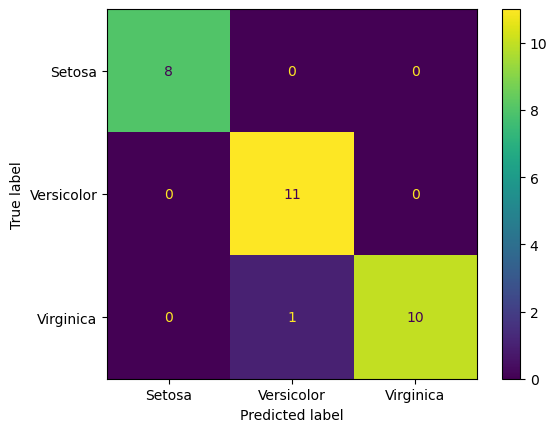

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.92      1.00      0.96        11
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [4]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

ConfusionMatrixDisplay.from_estimator(svclassifier,X_test, y_test)
plt.show()
print(classification_report(y_test,y_pred))


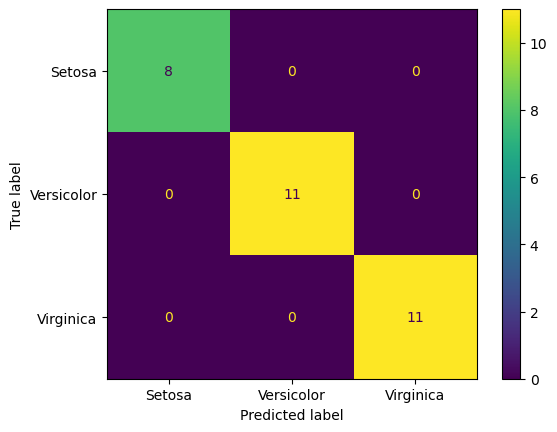

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
ConfusionMatrixDisplay.from_estimator(svclassifier,X_test, y_test)
plt.show()
print(classification_report(y_test,y_pred))

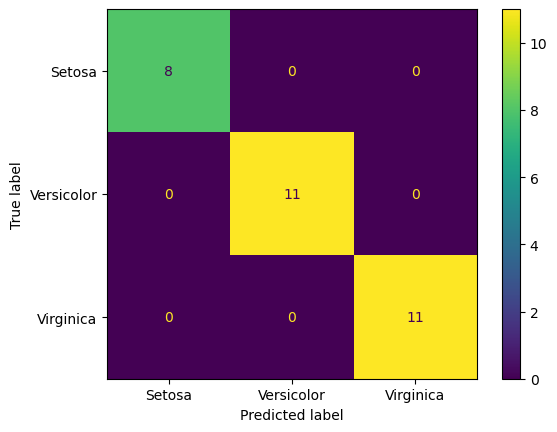

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
ConfusionMatrixDisplay.from_estimator(svclassifier,X_test, y_test)
plt.show()
print(classification_report(y_test,y_pred))

We can see that using second degree polynomial `kernel = 'poly'` and radial basis function (Gaussian exponential function) `kernel = 'rbf'` leads to better performance.

Note tha SVM is in its essence an algorithm for binary classification, sklearn allows us to apply it to multiclass classification as well. It achieves this by using a one-vs-rest strategy:
- class 1 vs (class 2, class 3)
- class 2 vs (class 1, class 3)
- class 3 vs (class 1, class 2)

## Feature scaling

When dealing with multiple explanatory variables it often makes a difference in machine learning models how the variables are scaled. Some variables may have large numbers  while other only small values. It may have opposite signs.

There are two common methods to rescale values:

- **Normalization**: subtract the min value from all numbers and divide by the difference between the smallest and largest value.
$$ X_{norm} = \frac{X - X_{min} }{X_{max} - X_{min} } $$

- **Standardization**: subtract by the mean value and divide by its standard deviation leading to a variable of mean zero and sdev of 1 (Standard normal distribution).
$$ X_{std} = \frac{X - \overline{X}}{std(X)} $$

- It is usually best to use normalization if variable is not Gaussian.
- Normalization does put bounds on new values.
- Using both methods leads to **loss of information** about the **unit**

Sklearn provides functions in the preprocessing module as `MinMaxScaler` and `StandardScaler`.

Let's try them with the students' heights and weights dataset.

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

In [8]:
path = os.path.join(os.getcwd(), "data/weight-height.csv")
df = pd.read_csv(path)
X = np.array(2.54* df.Height).reshape(-1,1)
X

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

Scaled them as follows

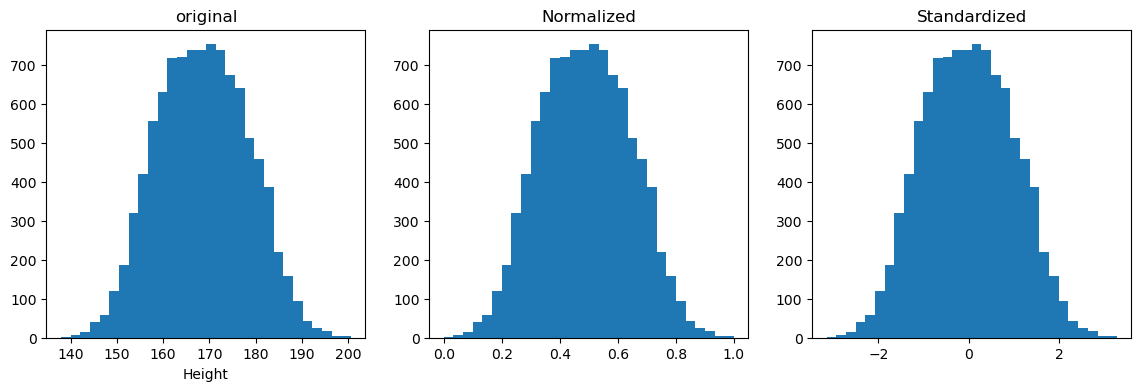

In [9]:
X_mm = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)

X = np.array(X)
X_mm = np.array(X_mm)
X_std = np.array(X_std)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.hist(X,30)
plt.xlabel("Height")
plt.title("original")
plt.subplot(1,3,2)
plt.hist(X_mm,30)
plt.title("Normalized")
plt.subplot(1,3,3)
plt.hist(X_std,30)
plt.title("Standardized")
plt.show()

Using the formulas:

In [10]:
X_mm2 = (X-np.min(X))/(np.max(X)-np.min(X))
print("diff=",np.max(np.abs(X_mm-X_mm2)))

X_std2 = (X-np.mean(X))/np.std(X)
print("diff2=",np.max(np.abs(X_std-X_std2)))

diff= 3.3306690738754696e-16
diff2= 0.0


## Effect of feature scaling in machine learning

Let's investigate how feature scaling affects the performance of a machine learning model with knn algorithm with the university admission data.

In [11]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import os

In [12]:
path = os.path.join(os.getcwd(), "data/Admission_Predict.csv")
df = pd.read_csv(path)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
X = df[["CGPA", "GRE Score"]]
y = df[["Chance of Admit "]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

lm = neighbors.KNeighborsRegressor(n_neighbors=5)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print("R2 = ", lm.score(X_test, y_test))

lm.fit(X_train_norm, y_train)
predictions2 = lm.predict(X_test_norm)
print("R2 (norm) =",lm.score(X_test_norm,y_test))

lm.fit(X_train_std, y_train)
predictions3 = lm.predict(X_test_std)
print("R2 (std) =",lm.score(X_test_std,y_test))

R2 =  0.7509928259756933
R2 (norm) = 0.7523599677299028
R2 (std) = 0.8090489285228912


We can see that we got slightly better performance using standardized features.

For completeness, we stress that predictions are now not in any one line (we are not doing linear regression) but spread like this:

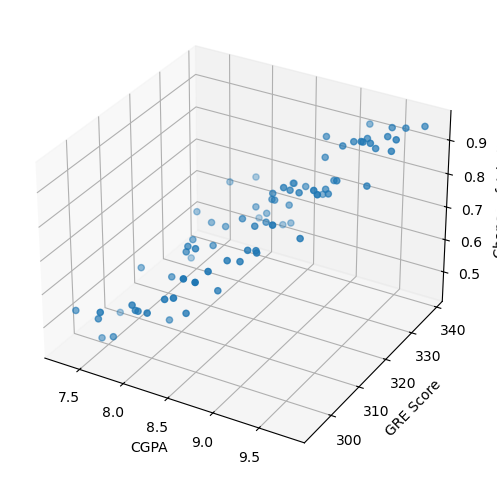

In [14]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.array(X_test[['CGPA']]),np.array(X_test[['GRE Score']]),predictions)
ax.set_xlabel('CGPA')
ax.set_ylabel('GRE Score')
ax.set_zlabel('Chance of Admit')
plt.show()

## Decision trees


Decision trees are most often applied to classification problems although they can be used for regression too with appropriate modifications.

A decision tree is a tree shaped diagram consisting of nodes and branches to make a decision. Leaves are at the very bottom of the tree. 

Starting from original full dataset we make a sequence of decisions and split the dataset into smaller parts. Eventually, at leaf nodes, there is nothing to split and we are done. This process leads us to some key terms in decision trees:

- **entropy** = amount of randomness (or unpredicatability) in a dataset.
- **information gain** = decrease in entropy after splitting a dataset.
- **Gini index** = value between 0 and 1 where 0 means that all elements belong to same class and 1 means that all elements are randomly distributed across various classes. So larger values indicate more randomness or impurity.

At the beginning, entropy is high in the original dataset. After several splits the entropy decreases and we gain more information.

Actual formula to compute entropy of a data set

$$ E = - \sum P_i log_2 P_i $$

where $P_i$ is the probability of sample taking on $i^{th}$ value. For example, consider the following datasets consisting of red ,blue, green and yellow marbles. Both sets contain 16 marbles.

|  | set 1  | set 2 |
|--     |-- |--     |
|red    | 4 | 1 |
|blue   | 4 | 1 |
|green  | 4 | 7 |
|yellow | 4 | 7 |

 - **Set 1** has the entropy score of 
$$ E = -( \frac{1}{4}log_2 \frac{1}{4} + \frac{1}{4}log_2 \frac{1}{4} + \frac{1}{4}log_2 \frac{1}{4} + \frac{1}{4}log_2 \frac{1}{4} ) = 2 $$

- **Set 2** has the entropy score of
$$ E = -( \frac{1}{16}log_2 \frac{1}{16} + \frac{1}{16}log_2 \frac{1}{16} + \frac{7}{16}log_2 \frac{7}{16} + \frac{7}{16}log_2 \frac{7}{16} ) = 1.544 $$

For **Gini index** the formula is:

$$ G = 1 - \sum P_i^2 $$ 

In the above problem set 1 has  $ G = 1- 4(\frac{1}{16}) = 0.75 $  and set 2 has $ G = 0.61 $. So again, set 1 contains more impurities.

These measures of impurity and randomness can be used to construct a decision tree in an optimal manner. More precisely, they help us pick the features which decreases entropy the most first.

## Decision trees in python

To illustrate the use of decision tree algorithm for a classification problem, we are going to use the Banknote authentication dataset from UCI concerning genuine and forged bank notes.

In [15]:
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [16]:
path = os.path.join(os.getcwd(), "data/data_banknote_authentication.csv")
df = pd.read_csv(path)
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


We use all the columns but the last as variables and `class` as target variable. Let's setup a decision tree classifier with a 80/20 split ratio.

In [17]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=11)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[160   4]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       164
           1       0.97      1.00      0.98       111

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



We have a 99% accuracy and high precision and recall scores too.

In [18]:
dot_data = export_graphviz(classifier, out_file=None,
            feature_names = X_train.columns,
            filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("output/dtree")

'output\\dtree.pdf'

![dtree01](../Artificial%20Intelligence%20with%20Python/pics/dtree01.png)

Diagram shows how nodes make decisions based on feature values and how Gini score decreases toward the leaves of the tree.

**Gini** index is the **default** criterion in sklearn. We can also use the **entropy** and in addition, specify the maximum depth of the tree. Example:

In [19]:
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

dot_data = export_graphviz(classifier, out_file=None,
            feature_names = X_train.columns,
            filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("output/dtree2")

[[157   7]
 [  4 107]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       164
           1       0.94      0.96      0.95       111

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



'output\\dtree2.pdf'

The result is slightly worse but the diagram is easier to interpret

![dtree02](../Artificial%20Intelligence%20with%20Python/pics/dtree02.png)

## Text data preparation, email spam classification

Text data (full sentences) has to be converted to numerical format before it can be used in machine learning. This is achieved by tokenizing the text, ie. parsing individual words from the text and assign them a numerical value for each word. In the simplest form, this is the word count or frequency. This approach does not pay any attention to the order in which words appear in the text; only count and frequency is stored.

Slearn provides a few convenient function for this purpose.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["The quick brown fox jumped over the lazy dog."]

vectorizer = CountVectorizer()
vectorizer.fit(text)

print("vocab : ", vectorizer.vocabulary_)

vocab :  {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


This shows the vocabulary in a python dictionary. Now any text can be encoded in numerical vector as follows

In [21]:
vector = vectorizer.transform(text)
print(vector.shape)
print(vector.toarray())

(1, 8)
[[1 1 1 1 1 1 1 2]]


In [22]:
vector = vectorizer.transform(["the brown fox and big puppy"])
print(vector.shape)
print(vector.toarray())

(1, 8)
[[1 0 1 0 0 0 0 1]]


As a use case example in classifying text data, let's consider the problem of classifying email as spam and ham. We will use the SVM algorithm on a dataset containing emails and their know classes.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import os
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
path = os.path.join( os.getcwd(), "data/emails.csv")
df = pd.read_csv(path)
print(df.spam.value_counts())
df.head()

spam
0    4360
1    1368
Name: count, dtype: int64


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Let's prepare the data

In [25]:
X = df.text
y = df.spam

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

Next encode training and testing texts into numerical vectors. Using `stop_words` in english ignores common words like "the", "and" etc from the vocabulary.

In [26]:
vect = CountVectorizer(stop_words="english")
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

Let's train and test the prediction model with SVM.

In [27]:
model = svm.SVC()
model.fit(X_train_df,y_train)
y_pred = model.predict(X_test_df)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=["not spam","spam"]))

[[859   2]
 [ 24 261]]
              precision    recall  f1-score   support

    not spam       0.97      1.00      0.99       861
        spam       0.99      0.92      0.95       285

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



Checking some correctly prediction of spam and ham.

In [28]:
y_test2 = np.array(y_test)
y_pred2 = np.array(y_pred)

idx = np.logical_and(y_pred2 == 0, y_test2 == 0)
spam0 = X_test[idx]
print("Not spam: (10 first..)",np.array(spam0.index)[:10])
print("Not spam sample =",X_test[3886])
print("Not spam sample =",X_test[5613])

print()

idx = np.logical_and(y_pred2 == 1, y_test2 == 1)
spam = X_test[idx]
print("spam: (10 first..) ",np.array(spam.index)[:10])
print("spam sample =",X_test[341])
print("spam sample =",X_test[774])

Not spam: (10 first..) [2507 3886 3330 5613 2357 5547 3169 3471 1858 4788]
Not spam sample = Subject: re : thanks !  karin ,  i talked to mike roberts ( the head of the whole weather team ) , and he is  saying that all expenses for tony should be charged to global products team .  this is agreed between vince and jeff shankman .  mike and vince are negotiating with john to put stephen ( or somebody who will  replace him ) to some other cost centres ( via research ) .  it looks like kevin moore is happy if stephen is charged to the same cost  centre as tony .  let us right now charge tony and stephen to the cost centre below .  please , could we charge them separately - when john and vince make their  decision , we should be able to re - charge .  many thanks ,  slava  enron capital & trade resources  canada corp .  from : karin ahamer @ enron 18 / 04 / 2001 15 : 06  to : tani nath / lon / ect @ ect , viacheslav danilov / lon / ect @ ect  cc :  subject : re : thanks !  tani / slava  cou